## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Reading Dataset

In [2]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Checking Missing Values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [4]:
df.isna().sum(axis=0)

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

- No missing Values

## Data Cleaning

In [5]:
df.columns = df.columns.str.replace(' ','_')

In [6]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

## Feature Selections
- I decide to go with pre-selected features although a feature selection library would have been better

In [7]:
X = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y = df['CO2EMISSIONS']

In [8]:
X.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
0,2.0,4,8.5
1,2.4,4,9.6
2,1.5,4,5.9
3,3.5,6,11.1
4,3.5,6,10.6


In [9]:
y

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64

## Relationships between Explanatory and Dependent Variables

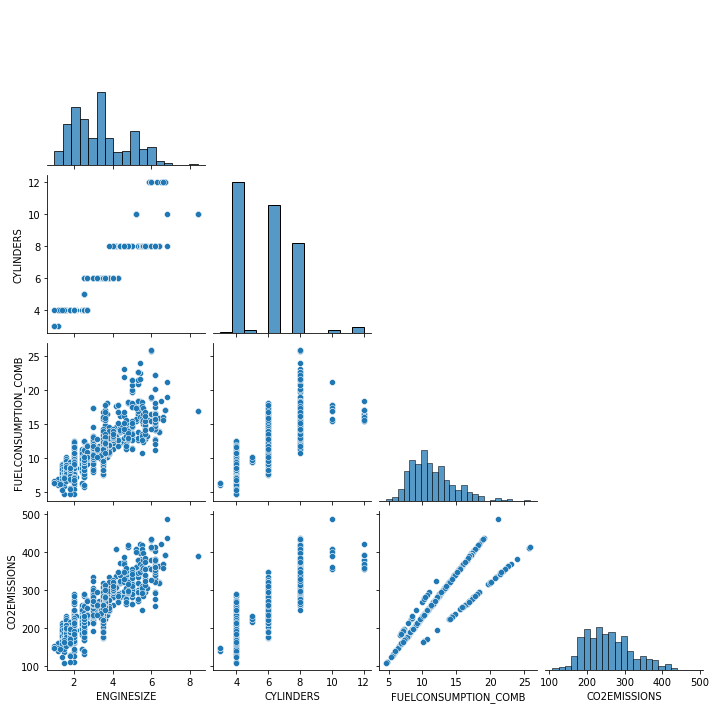

In [10]:
sns.pairplot(
    data = pd.concat([X,y],axis=1),
    corner=True,
    kind='scatter')

<AxesSubplot:>

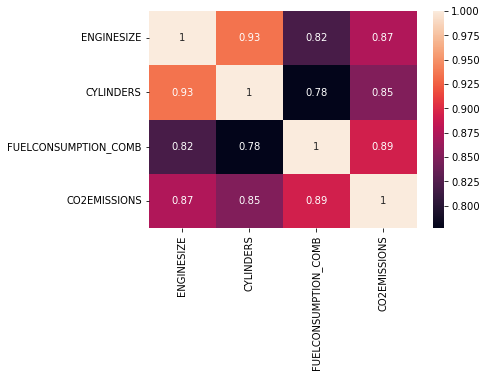

In [11]:
df_temp = pd.concat([X,y],axis=1)
df_corr = df_temp.corr()
sns.heatmap(data = df_corr,
            annot=True)

- We observe high-multicollinearity,  
- Normally we would fix this by feature selection but for now,  I will continue without fix

## Train Test Split

In [12]:
X_train , X_test , y_train , y_test = train_test_split(X,y,
                                                       random_state=42,
                                                       train_size=0.7)

## Base Model
- using a linear regression model with degree 1 as my base, I will continue to build from here

In [13]:
model_base = Pipeline([
    ('Scaler',StandardScaler()),
    ('PolynomialFeatures',PolynomialFeatures(degree=1)),
    ('Regression',LinearRegression())
])

In [14]:
model_base.fit(X_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('PolynomialFeatures', PolynomialFeatures(degree=1)),
                ('Regression', LinearRegression())])

### Accuracy
~ 87.51%

In [15]:
model_base.score(X_test,y_test)

0.8751447816602106

## Polynomial Regression

### Create Pipeline

In [16]:
PolynomialRegression = Pipeline([
        ('PolynomialFeatures',PolynomialFeatures()),
        ('Regressor',LinearRegression())
    ])

In [17]:
PolynomialRegression.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'PolynomialFeatures', 'Regressor', 'PolynomialFeatures__degree', 'PolynomialFeatures__include_bias', 'PolynomialFeatures__interaction_only', 'PolynomialFeatures__order', 'Regressor__copy_X', 'Regressor__fit_intercept', 'Regressor__n_jobs', 'Regressor__normalize', 'Regressor__positive'])

### Parameter Dictionary for GridSearchCV

In [18]:
para_dict = [{
    'PolynomialFeatures__degree': range(1,6)
}]

### GridSearchCV model training

In [19]:
model_poly = Pipeline([
    ('scaler' , StandardScaler()),
    ('grid_search',GridSearchCV(estimator=PolynomialRegression,
                                 param_grid=para_dict,
                                 cv = 10,
                                 scoring='r2',
                                 refit=True,))
])

In [20]:
model_poly.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('grid_search',
                 GridSearchCV(cv=10,
                              estimator=Pipeline(steps=[('PolynomialFeatures',
                                                         PolynomialFeatures()),
                                                        ('Regressor',
                                                         LinearRegression())]),
                              param_grid=[{'PolynomialFeatures__degree': range(1, 6)}],
                              scoring='r2'))])

### Model performs best with degree 4

In [21]:
best_model_degree = model_poly['grid_search'].best_params_
best_model_degree

{'PolynomialFeatures__degree': 4}

### Training a Model with Degree 4

In [22]:
best_model = Pipeline([
    ('scaler',StandardScaler()),
    ('PolynomialFeatures',PolynomialFeatures(degree = 4)),
    ('Regressor',LinearRegression())
])

In [23]:
best_model.fit(X_test,y_test)

Pipeline(steps=[('scaler', StandardScaler()),
                ('PolynomialFeatures', PolynomialFeatures(degree=4)),
                ('Regressor', LinearRegression())])

In [24]:
best_model.score(X_test,y_test)

0.9545453232966838

### Accuracy
- we increase our accuracy by ~8%

## Model Evaluation

### RMSE Error

In [25]:
from math import sqrt

In [26]:
rmse_base = sqrt(mean_squared_error(model_base.predict(X_test),y_test))
print("RMSE of Linear Model : {0:.2f}".format(rmse_base))

rmse_poly = sqrt(mean_squared_error(best_model.predict(X_test),y_test))
print("RMSE of Polynomial Model(Degree 4) : {0:.2f}".format(rmse_poly))

RMSE of Linear Model : 22.44
RMSE of Polynomial Model(Degree 4) : 13.54


### MAE Error

In [27]:
mae_base = mean_absolute_error(model_base.predict(X_test),y_test)
print("MAE of Linear Model : {0:.2f}".format(mae_base))

mae_poly = mean_absolute_error(best_model.predict(X_test),y_test)
print("MAE of Polynomial Model(Degree 4) : {0:.2f}".format(mae_poly))

MAE of Linear Model : 16.54
MAE of Polynomial Model(Degree 4) : 8.04


### r2 Score

In [28]:
r2_base = r2_score(model_base.predict(X_test),y_test)
print("r2 score of Linear Model : {0:.2f}".format(r2_base))

r2_poly = mean_absolute_error(best_model.predict(X_test),y_test)
print("r2 of Polynomial Model(Degree 4) : {0:.2f}".format(r2_poly))

r2 score of Linear Model : 0.85
r2 of Polynomial Model(Degree 4) : 8.04


## Conclusion

- we can conclude that model with degree = 4 is the best model of all because of better performance metrics